In [1]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
!apt install g++ openjdk-8-jdk python3-dev
!pip3 install konlpy
!pip3 install wordcloud
!pip3 install ujson

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
python3-dev is already the newest version (3.6.7-1~18.04).
openjdk-8-jdk is already the newest version (8u292-b10-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:

DATA_DIR = '/content/drive/My Drive/Colab Notebooks/유학사상/'


In [4]:

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re

plt.rcParams['axes.unicode_minus'] = False
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()



In [5]:
input_file_name = DATA_DIR + '논어텍스트.txt'


In [6]:
from collections import Counter

wordform_counter = Counter()

with open(input_file_name, 'r', encoding='utf-8') as input_file:
    for line in input_file:
        wordforms = line.split()
        
        for wordform in wordforms:
            wordform_counter[wordform] += 1
            
for wordform, count in wordform_counter.most_common(10):
    print(f"{wordform}\t{count}")

:	1533
말씀하시기를,	484
공자	404
하셨다.	397
그	191
것을	162
말하기를,	148
하니	137
것이다.”고	121
공자께서	101


In [7]:

import re
from konlpy.tag import Komoran

def split_sentences(text):
    """주어진 텍스트를 문장들로 분절하여 돌려준다."""
    
    sentences = re.split("(?<=[.?!])\s+", text)
    sentences = [s.strip() for s in sentences if s.strip()]
    
    return sentences

def morph_anal(komoran, text, join=True):
    """주어진 테스트를 문장들로 분절한 뒤 형태소 분석하여 돌려준다."""
    
    sentence_morph_anals = []
    sentences = split_sentences(text)
    
    for sentence in sentences:
        sentence_morph_anal = komoran.pos(sentence, join=join)
        sentence_morph_anals.append(sentence_morph_anal)
        
    return sentences, sentence_morph_anals

In [8]:
from konlpy.tag import Komoran

komoran = Komoran()

with open(input_file_name, "r", encoding="utf-8") as input_file:
    for line in input_file:
        line = line.strip()
        
        if not line:
            continue
            
        sentences, sentence_morph_anals = morph_anal(komoran, line)
        
        for sentence, sentence_morph_anal in zip(sentences, sentence_morph_anals):
            print(f";{sentence}")
            morph_anal_str = " ".join(sentence_morph_anal)
            print(morph_anal_str)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
;<13>
</SS 13/SN >/SS
;子欲居九夷(자욕거구이)러시니:  공자께서 구이에 옮겨 살고자 하셨더니,
子欲居九夷/SH (/SS 자/NNG 욕/NNG 거/NNB 구이/NNP )/SS 러/NNP 시니/NNP :/SP 공자/NNP 께서/JKS 구이/NNP 에/JKB 옮기/VV 어/EC 살/VV 고자/EC 하/VV 시/EP 었/EP 더니/EC ,/SP
;或曰陋(혹왈루)어니:  어떤 사람이 말하기를, “누추하다는데
或曰陋/SH (/SS 혹/NNG 와/JKB ㄹ루/JKB )/SS 얼/VV 니/EC :/SP 어떤/MM 사람/NNG 이/JKS 말/NNG 하/XSV 기/ETN 를/JKO ,/SP “/SS 누추/XR 하/XSA 다는데/EC
;如之何(여지하)잇고:  어떻게 그러하실 수 있겠습니까?”고 하니
如之何/SH (/SS 여/NNP 지하/NNP )/SS 잇/VV 고/EC :/SP 어떻/VA 게/EC 그러/XR 하/XSA 시/EP ㄹ/ETM 수/NNB 있/VX 겠/EP 습니까/EF ?/SF ”/SS 고/JKQ 하/VV 니/EC
;子曰君子居之(자왈군자거지)면:  공자 말씀하시기를, “군자가 거하니
子曰君子居之/SH (/SS 자와/NNP ㄹ/ETM 군자/NNP 거지/NNG )/SS 이/VCP 면/EC :/SP 공자/NNP 말씀/NNG 하/XSV 시/EP 기/ETN 를/JKO ,/SP “/SS 군자/NNP 가/JKS 거/NNB 하니/NNP
;何陋之有(하루지유)리오:  무슨 누추함이 있겠느냐?”고 하셨다.
何陋之有/SH (/SS 하루/NNP 지유/NNP )/SS 리오/NNP :/SP 무슨/MM 누추/XR 하/XSA ㅁ/ETN 이/JKS 있/VX 겠/EP 느냐/EF ?/SF ”/SS 고/JKQ 하/VV 시/EP 었/EP 다/EF ./SF
;<14>
</SS 14/SN >/SS
;子曰吾自衛反魯然後樂正(자왈오자위반로연후락정)하여:  공자 말씀하시기를, “네가 위나라로부터 노나라로 돌아온 후에 음악이 바르게 되어
子

In [9]:
from collections import Counter
from konlpy.tag import Komoran

morph_counter = Counter()
komoran = Komoran()

with open(input_file_name, "r", encoding="utf-8") as input_file:
    for line in input_file:
        line = line.strip()
        
        if not line:
            continue
            
        sentences, sentence_morph_anals = morph_anal(komoran, line)
        
        for sentence_morph_anal in sentence_morph_anals:
            
            morph_counter.update(sentence_morph_anal)
        
for morph, count in morph_counter.most_common(60):
    print(f"{morph}\t{count}")

:/SP	3412
(/SS	3356
)/SS	3356
하/XSV	2004
이/VCP	1723
./SF	1403
시/EP	1372
를/JKO	1338
하/VV	1178
,/SP	1013
을/JKO	934
기/ETN	903
다/EF	891
이/JKS	783
고/EC	773
것/NNB	727
ㄹ/ETM	713
“/SS	685
었/EP	660
공자/NNP	653
고/JKQ	645
에/JKB	638
는/JX	633
지/EC	628
”/SS	610
말씀/NNG	531
>/SS	501
</SS	500
가/JKS	496
ㄴ/ETM	493
는/ETM	487
니/EC	486
며/EC	436
면/EC	430
의/JKG	387
자와/NNP	379
말/NNG	360
니라/EC	356
은/JX	326
왈/NNG	324
아/EC	320
야/JKV	301
?/SF	274
어/EC	270
사람/NNG	249
이/NNP	225
자/NNB	223
불/XPN	222
다/EC	217
았/EP	213
라/EC	209
있/VV	208
그/MM	205
하/XSA	205
게/EC	205
않/VX	202
못하/VX	197
아니하/VX	194
군자/NNP	190
없/VA	176


In [24]:
from konlpy.tag import Okt 
from collections import Counter 
import csv 
filename = input_file_name
f = open(filename,'r',encoding='utf-8') 
news = f.read() 

# okt 객체 생성 
okt = Okt() 
noun = okt.nouns(news) 
for i,v in enumerate(noun): 
  if len(v)<2: 
    noun.pop(i) 
count = Counter(noun) 
f.close() 

# 명사 빈도 카운트 
noun_list = count.most_common(100) 
for v in noun_list: 
  print(v) # txt 파일에 저장 
  
with open(DATA_DIR + "논어_명사출현빈도.txt",'w',encoding='utf-8') as f: 
  for v in noun_list: 
    f.write(" ".join(map(str,v))) #튜플 int값을 str 타입으로 전환 후 조인 
    f.write("\n") 
    
# csv 파일에 저장 
with open(DATA_DIR + "논어_명사출현빈도.csv","w", newline='',encoding='utf-8') as f: 
  csvw = csv.writer(f) 
  csvw.writerow(['keyword', 'count'])
  for v in noun_list: 
    csvw.writerow(v)



('공자', 650)
('말씀', 531)
('하니', 290)
('고', 263)
('사람', 245)
('것', 211)
('자왈', 192)
('군자', 189)
('이면', 115)
('자로', 98)
('리오', 97)
('자공', 89)
('어찌', 83)
('러시', 76)
('말', 73)
('반드시', 72)
('나라', 66)
('백성', 66)
('어진', 64)
('그', 56)
('임금', 53)
('자장', 52)
('하나', 50)
('이불', 46)
('이요', 45)
('인저', 43)
('천하', 42)
('가지', 40)
('자하', 40)
('소인', 40)
('자', 37)
('정사', 37)
('생각', 37)
('무엇', 37)
('대답', 36)
('불가', 35)
('이', 35)
('로라', 35)
('선생님', 33)
('수', 33)
('근심', 33)
('어늘', 33)
('증자', 32)
('또한', 30)
('비록', 30)
('자기', 30)
('하사', 30)
('여야', 30)
('부자', 28)
('내', 28)
('왈부', 27)
('이위', 27)
('허물', 26)
('자가', 25)
('하리', 25)
('로써', 25)
('불', 25)
('안연', 25)
('마음', 24)
('번지', 23)
('염유', 23)
('공경', 22)
('가위', 22)
('자유', 22)
('어니', 22)
('예', 21)
('이의', 21)
('면', 20)
('지위', 20)
('왈', 20)
('불능', 20)
('이나', 20)
('하늘', 20)
('지자', 20)
('위', 20)
('감히', 20)
('대부', 19)
('이로', 19)
('니', 19)
('도', 19)
('관중', 19)
('선비', 19)
('하라', 19)
('불지', 18)
('얼굴빛', 18)
('계씨', 18)
('자위', 18)
('능', 18)
('지혜', 18)
('문인', 18)
('성인', 18)
('하

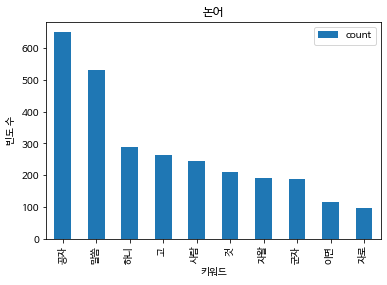

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(DATA_DIR + "논어_명사출현빈도.csv")
# df.columns = ['keyword', 'count'] #col 라벨 추가
df = df.iloc[0:10, :]
df.plot(kind='bar',x='keyword',y='count')
plt.title("논어")
plt.xlabel('키워드')
plt.ylabel('빈도 수')
plt.show()

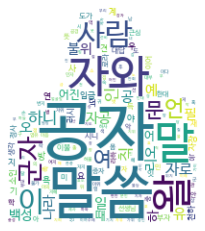

In [33]:
# 형태소 빈도 시각화

from collections import Counter
from konlpy.tag import Komoran
import wordcloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

morph_counter = Counter()
komoran = Komoran()

with open(input_file_name, "r", encoding="utf-8") as input_file:
    for line in input_file:
        line = line.strip()
        
        if not line:
            continue
            
        sentences, sentence_morph_anals = morph_anal(komoran, line, join=False)
        
        for sentence_morph_anal in sentence_morph_anals:
            for morph, morph_pos in sentence_morph_anal:
                if morph_pos in {"NNP", "NNG", "XR"}:
                    morph_counter[morph] += 1
        

font_file_name = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"


mask = np.array(Image.open(DATA_DIR + '공자사진.jpeg'))


cloud_gen = wordcloud.WordCloud(font_path=font_file_name, max_words=200,
                                collocations=False, background_color='white',mask=mask)

cloud = cloud_gen.generate_from_frequencies(morph_counter)

plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()  